In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import graphviz
import pydotplus
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv('covid-19.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [51]:
df.info

<bound method DataFrame.info of               Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-05-21 02:32:54  32.3182   
1                     Alaska             US  2020-05-21 02:32:54  61.3707   
2             American Samoa             US  2020-05-21 02:32:54 -14.2710   
3                    Arizona             US  2020-05-21 02:32:54  33.7298   
4                   Arkansas             US  2020-05-21 02:32:54  34.9697   
5                 California             US  2020-05-21 02:32:54  36.1162   
6                   Colorado             US  2020-05-21 02:32:54  39.0598   
7                Connecticut             US  2020-05-21 02:32:54  41.5978   
8                   Delaware             US  2020-05-21 02:32:54  39.3185   
9           Diamond Princess             US  2020-05-21 02:32:54      NaN   
10      District of Columbia             US  2020-05-21 02:32:54  38.8974   
11                   Florida             US 

In [52]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [53]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [54]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [55]:
df.shape

(58, 18)

In [56]:
#Check if there are any null values in dataset
df.isnull().values.any()

True

In [57]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lat,56.0,3.684009e+01,1.088704e+01,-14.271000,3.459460e+01,3.906185e+01,4.236165e+01,6.137070e+01
Long_,56.0,-8.520661e+01,4.975445e+01,-170.132000,-1.011658e+02,-8.794420e+01,-7.697062e+01,1.456739e+02
Confirmed,58.0,2.675609e+04,5.256203e+04,0.000000,2.596000e+03,1.014850e+04,2.939550e+04,3.543700e+05
Deaths,58.0,1.611017e+03,4.084751e+03,0.000000,7.400000e+01,3.850000e+02,1.394250e+03,2.863600e+04
Recovered,42.0,7.007429e+03,1.167449e+04,13.000000,9.700000e+02,3.008000e+03,7.326750e+03,6.188600e+04
Active,58.0,2.007072e+04,4.129471e+04,0.000000,8.125000e+02,5.644500e+03,1.929125e+04,2.638480e+05
FIPS,58.0,3.288086e+03,1.740835e+04,1.000000,1.825000e+01,3.250000e+01,4.775000e+01,9.999900e+04
Incident_Rate,56.0,3.962308e+02,4.026825e+02,0.000000,1.485210e+02,2.504773e+02,4.778885e+02,1.821620e+03
People_Tested,56.0,2.258534e+05,2.987834e+05,124.000000,4.608100e+04,1.386545e+05,2.796948e+05,1.505836e+06
People_Hospitalized,33.0,4.897455e+03,1.318563e+04,65.000000,5.350000e+02,1.493000e+03,4.389000e+03,7.641000e+04


In [58]:
df['Lat']=df['Lat'].fillna((df['Lat'].median()))
df['Long_']=df['Long_'].fillna((df['Long_'].median()))
df['Recovered']=df['Recovered'].fillna((df['Recovered'].median()))
df['People_Hospitalized']=df['People_Hospitalized'].fillna((df['People_Hospitalized'].median()))
df['Incident_Rate']=df['Incident_Rate'].fillna((df['Incident_Rate'].median()))
df['People_Tested']=df['People_Tested'].fillna((df['People_Tested'].median()))
df['Hospitalization_Rate']=df['Hospitalization_Rate'].fillna((df['Hospitalization_Rate'].median()))
df['Testing_Rate']=df['Testing_Rate'].fillna((df['Testing_Rate'].median()))
df['Mortality_Rate']=df['Mortality_Rate'].fillna((df['Mortality_Rate'].median()))
df.head(2)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,3008.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,1493.0,2.493766,84000002,USA,5063.940017,13.598326


In [59]:
le=LabelEncoder()
df['Province_State']=le.fit_transform(df['Province_State'])
df['Country_Region']=le.fit_transform(df['Country_Region'])
df['ISO3']=le.fit_transform(df['ISO3'])
df.head(2)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,3008.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,4,3353.942386,11.438860
1,1,0,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,1493.0,2.493766,84000002,4,5063.940017,13.598326


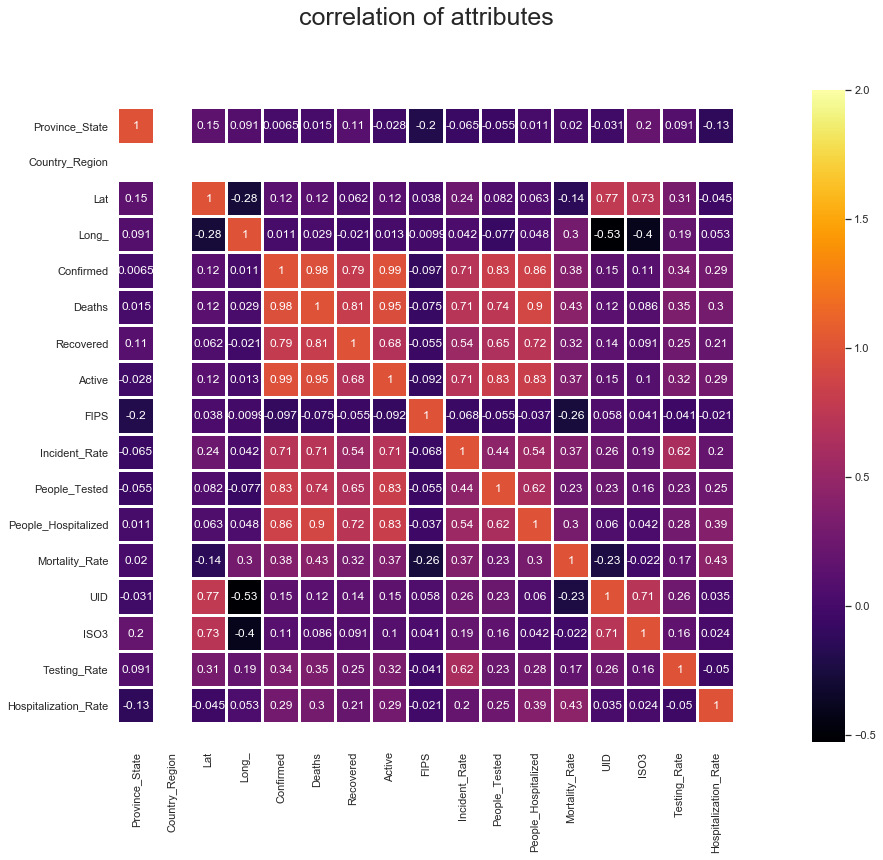

In [60]:
# Heat map represents of correlation between the various attributes
colormap=plt.cm.inferno # color range to be used in heat map
plt.figure(figsize=(28,12))
plt.title('correlation of attributes',y=1.09, size=25)
sns.heatmap(df.corr(),linewidths=2,vmax=2,square=True,cmap=colormap,linecolor='white',annot=True)

# snippet to overcome the top and bottom row breaking cells(matplotlib version specfic issue)
b,t = plt.ylim()# discover the values for button and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b,t)# update the ylim(bottom,top)values
plt.show()

In [80]:
# Target column distribution
pd.value_counts(df['ISO3'])

4    53
5     1
3     1
2     1
1     1
0     1
Name: ISO3, dtype: int64

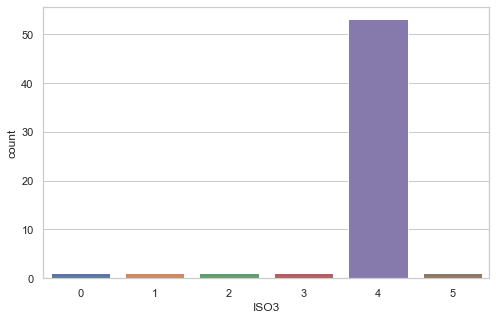

In [79]:
# Target column distribution plot
sns.set(style='whitegrid');plt.figure(figsize=(8,5))
sns.countplot(x='ISO3',data=df)

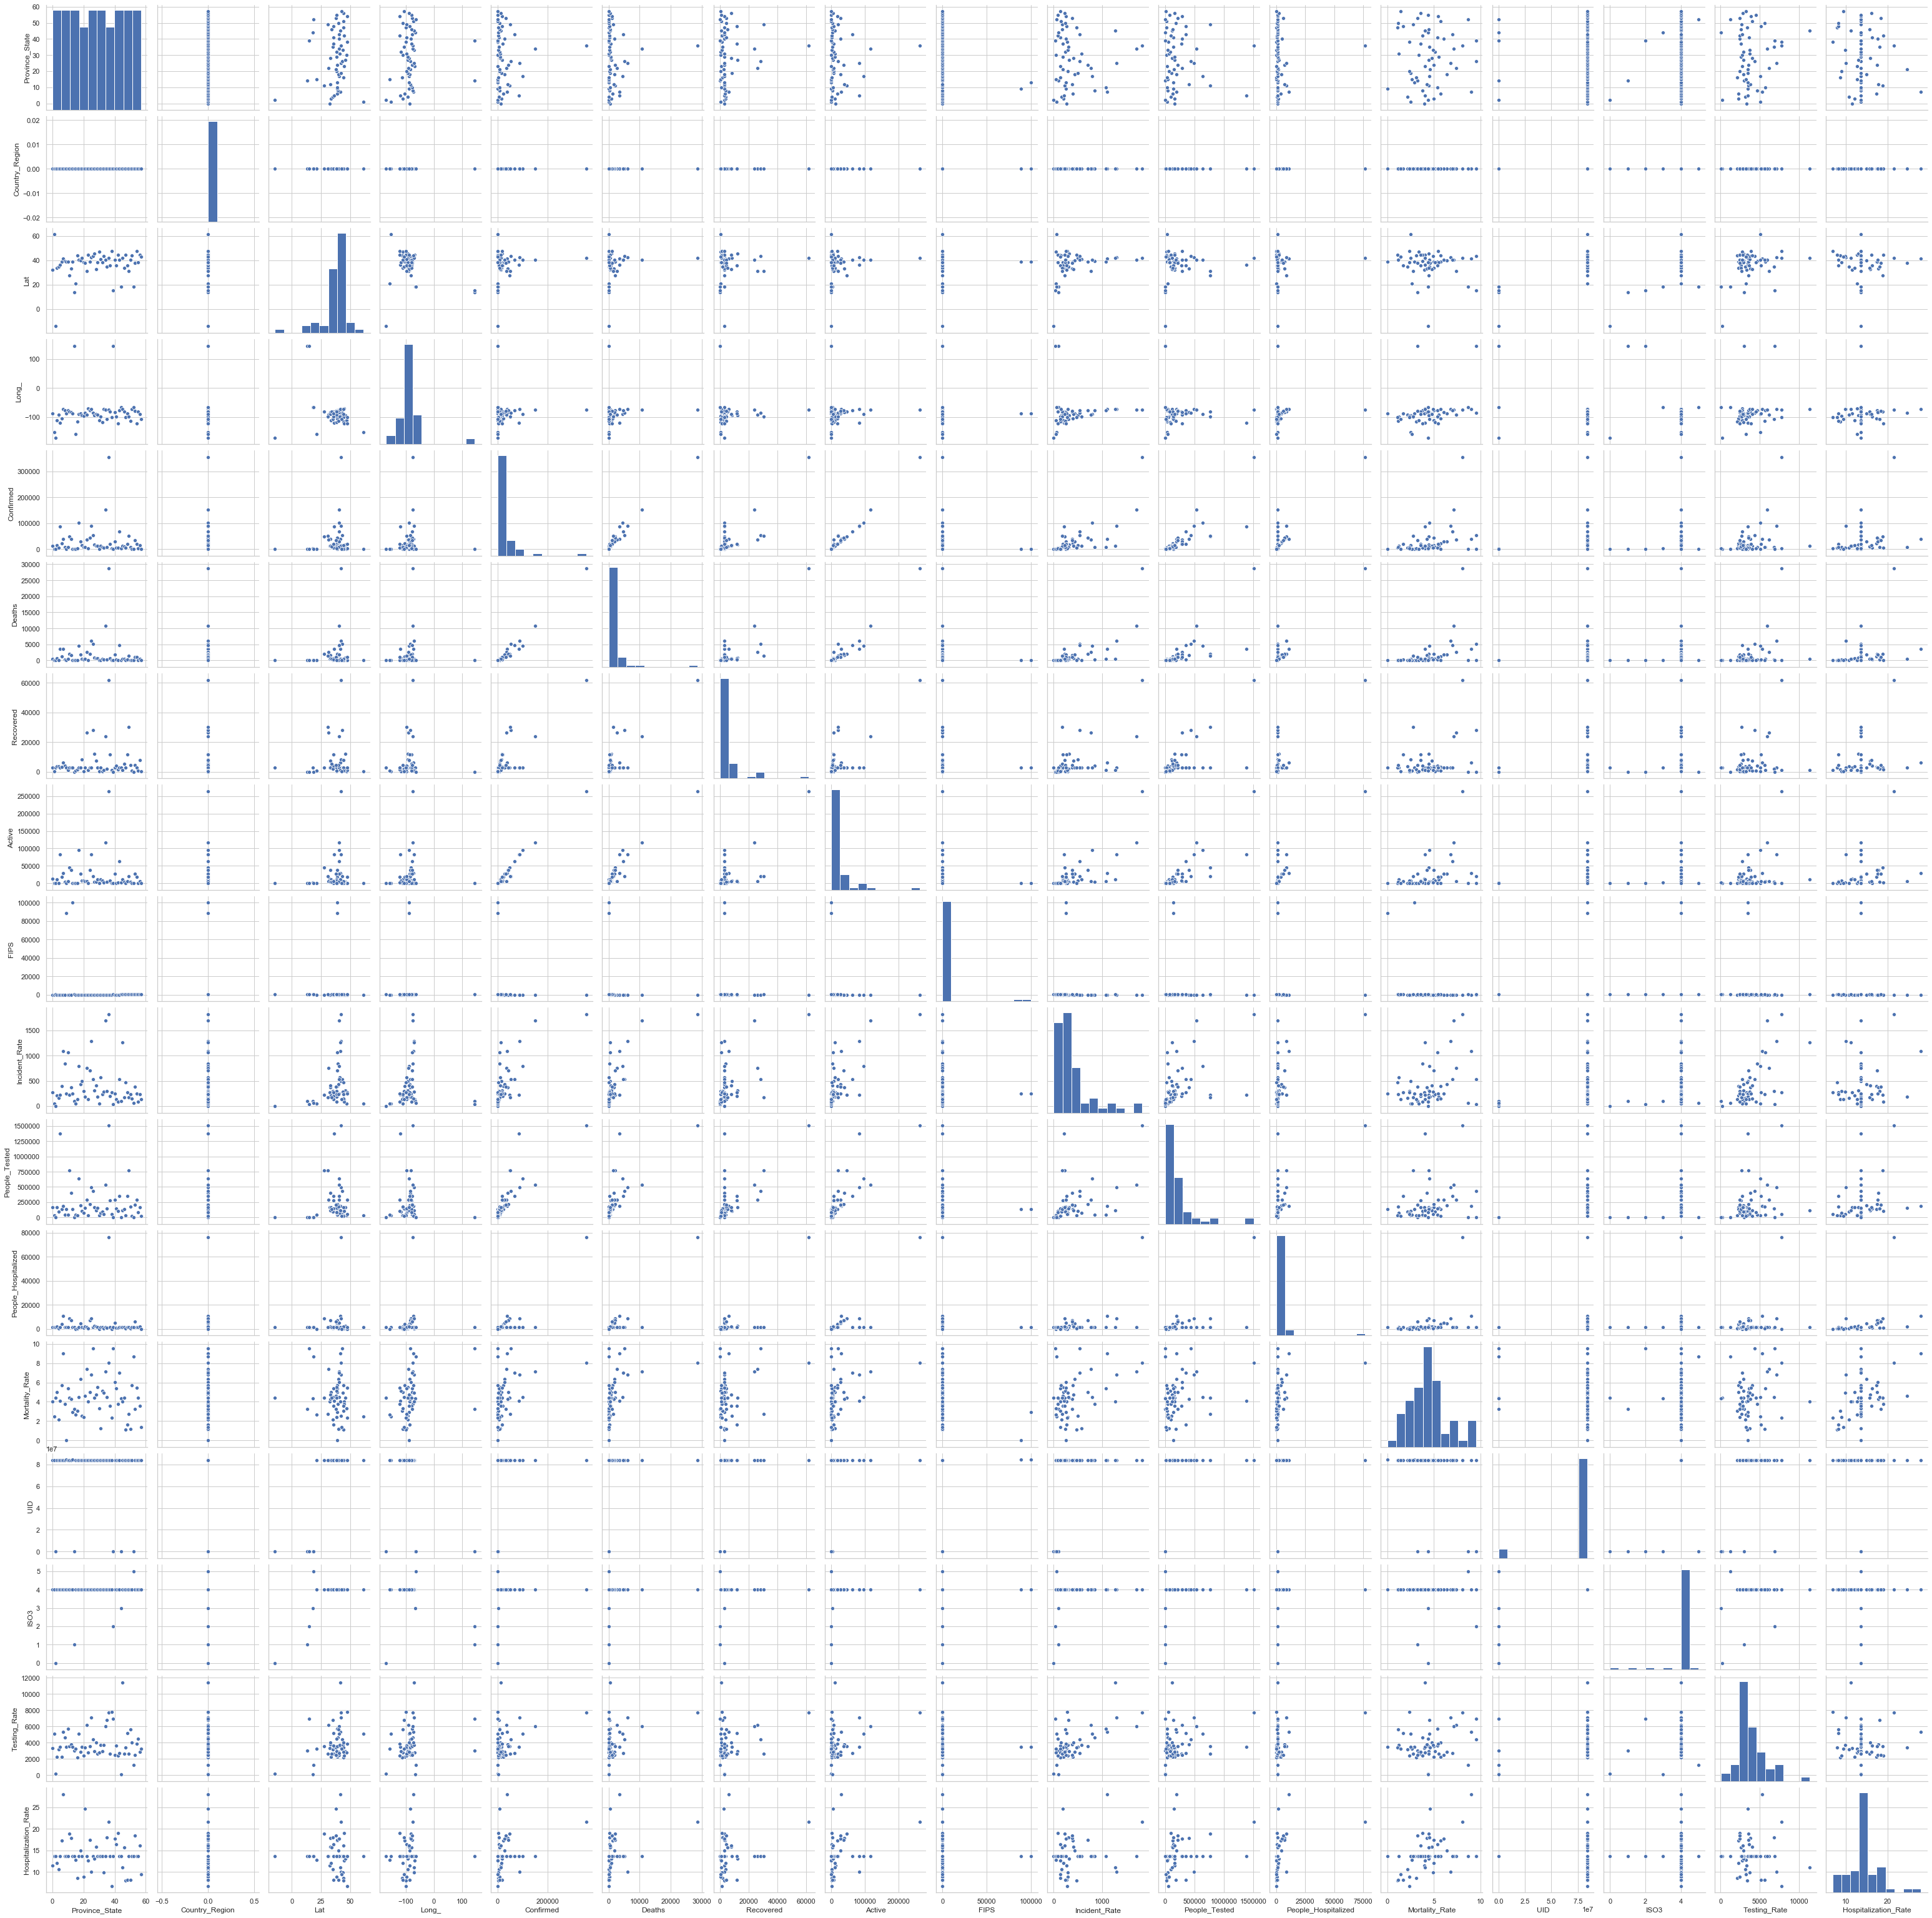

In [63]:
sns.pairplot(df)

In [64]:
# Drop useless columns
df =df.drop(columns=['Last_Update'])

In [66]:
df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long_', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

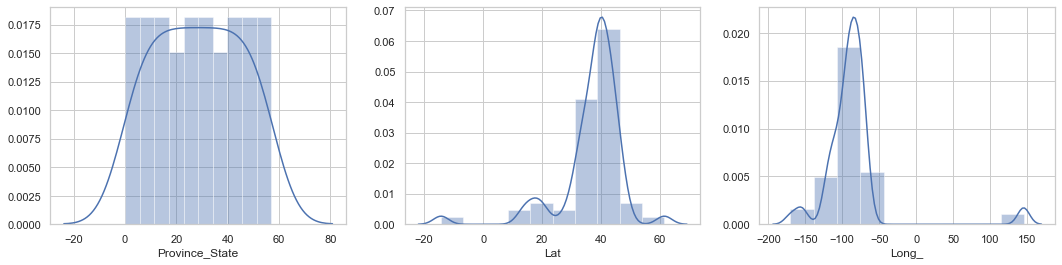

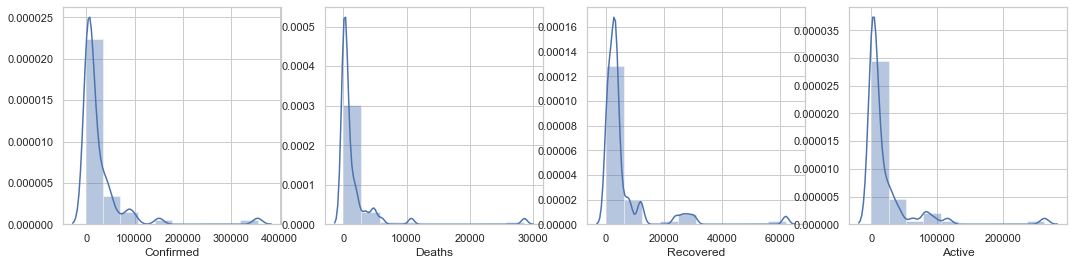

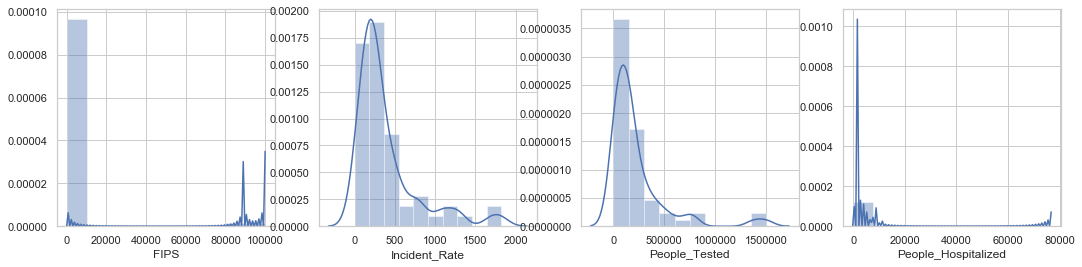

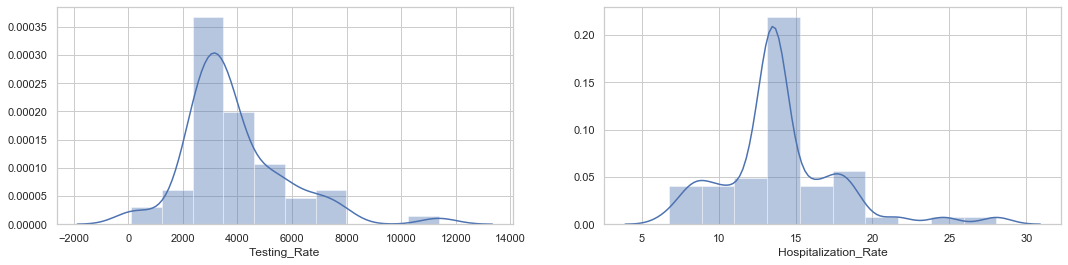

In [67]:
# Graphical distribution of Attributes 
f,ax=plt.subplots(1,3, figsize=(18,4))
sns.distplot(df['Province_State'],bins=10,ax=ax[0])
sns.distplot(df['Lat'],bins=10,ax=ax[1])
sns.distplot(df['Long_'],bins=10,ax=ax[2])

# Graphical distribution of Attributes 
f,ax=plt.subplots(1,4, figsize=(18,4))
sns.distplot(df['Confirmed'],bins=10,ax=ax[0])
sns.distplot(df['Deaths'],bins=10,ax=ax[1])
sns.distplot(df['Recovered'],bins=10,ax=ax[2])
sns.distplot(df['Active'],bins=10,ax=ax[3])


# Graphical distribution of Attributes 
f,ax=plt.subplots(1,4, figsize=(18,4))
sns.distplot(df['FIPS'],bins=10,ax=ax[0])
sns.distplot(df['Incident_Rate'],bins=10,ax=ax[1])
sns.distplot(df['People_Tested'],bins=10,ax=ax[2])
sns.distplot(df['People_Hospitalized'],bins=10,ax=ax[3])

# Graphical distribution of Attributes (13-16)
f,ax=plt.subplots(1,2, figsize=(18,4))
sns.distplot(df['Testing_Rate'],bins=10,ax=ax[0])
sns.distplot(df['Hospitalization_Rate'],bins=10,ax=ax[1])



In [81]:
# Sepearting target and input variables
import numpy as np
df_x=df.drop(columns=['ISO3'])
y=df[["ISO3"]]

In [82]:
# Scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [87]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=55,test_size=0.20)


In [88]:
#print the shape of the train and test data values

print(train_x.shape)

print(train_y.shape)

print(test_x.shape)

print(test_y.shape)

(46, 16)
(46, 1)
(12, 16)
(12, 1)


In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [91]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
lr.coef_

array([[ 3.24280786e-02,  6.29635233e-14, -1.86490219e-01,
        -5.60620818e-01,  5.43685795e+00, -1.27537393e+00,
        -1.00190683e+00, -3.70969987e+00,  1.22292100e-01,
         5.66912066e-02, -7.38424181e-02,  2.91820103e-01,
         2.99563565e-01,  1.40754638e-01, -3.10704165e-02,
        -1.22899663e-01]])

In [93]:
lr.intercept_

array([3.97429478])

In [94]:
lr.score(train_x,train_y)

0.8925455470941301

In [95]:
lr.score(test_x,test_y)

-0.9346037489786995

In [96]:
pred=lr.predict(test_x)
print("Predicted value and actual of fare",pred,test_y)

Predicted value and actual of fare [[4.54093111]
 [3.90050487]
 [4.30298091]
 [4.02324252]
 [3.87372241]
 [4.17053816]
 [4.89738058]
 [4.39319787]
 [3.78500745]
 [3.90290221]
 [4.56075051]
 [5.15793837]]     ISO3
3      4
4      4
22     4
55     4
56     4
5      4
15     4
6      4
34     4
40     4
32     4
2      0
